In [9]:
import geopandas as gpd
import fiona

In [10]:
gpd.__version__

'1.0.1'

In [11]:
fiona.__version__

'1.9.6'

Geometry error when reading file using geopandas

In [12]:
data = gpd.read_file('3D_LoD1/2023_Freiburg_LoD1.gml', driver='pyogrio')

ERROR 1: PROJ: proj_create_from_database: /Users/lisawinkler/opt/anaconda3/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
/Users/lisawinkler/Documents/Work/Meteorology/freiburg/.conda/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GML does not support open option DRIVER
  return ogr_read(


GeometryError: Geometry type is not supported: 1015

In [13]:
data = gpd.read_file('3D_LoD1/2023_Freiburg_LoD1.gml', driver='fiona')

GeometryError: Geometry type is not supported: 1015

Yet it works when using fiona and then converting into a geodataframe

In [14]:
data = fiona.open('3D_LoD1/2023_Freiburg_LoD1.gml', 'r')

In [15]:
gdf = gpd.GeoDataFrame.from_features([feature for feature in data], crs=data.crs)

In [16]:
gdf

,geometry,gml_id,Bodenhoehe,Firsthoehe,Traufhoehe,roofType,measuredHeight,measuredHeight_uom,Gemeindeschluessel,Hausnummer,Lagebezeichnung,class,name
0,MULTIPOLYGON Z (((415471.94 5320160.91 254.218...,DEBWL0010007TIIT,254.218,272.838,272.838,1000,18.620,m,NaN,None,None,None,None
1,"MULTIPOLYGON Z (((415482.98 5320280.25 254.52,...",DEBWL0010007TIIU,254.520,257.504,257.504,1000,2.984,m,NaN,None,None,None,None
2,"MULTIPOLYGON Z (((415778.23 5320353.1 250.677,...",DEBWL0010007TII4,250.677,257.946,257.946,1000,7.269,m,NaN,None,None,None,None
3,MULTIPOLYGON Z (((415530.57 5320711.03 239.074...,DEBWL001000i26bW,239.074,241.617,241.617,1000,2.543,m,NaN,None,None,None,None
4,"MULTIPOLYGON Z (((415804.88 5320341.4 250.696,...",DEBWL0010007TIHZ,250.696,256.876,256.876,1000,6.181,m,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,MULTIPOLYGON Z (((413425.93 5313736.66 315.967...,DEBWL001000g414h,315.967,333.999,333.999,1000,18.032,m,8311000.0,None,Distr. Illenberg,Öffentlich,Zedernhütte
59956,MULTIPOLYGON Z (((413678.18 5313840.65 301.605...,DEBWL001000s0iiB,301.605,305.280,305.280,1000,3.675,m,8311000.0,8,Wonnhaldestraße,Öffentlich,None
59957,MULTIPOLYGON Z (((413602.58 5313847.97 306.829...,DEBWL0010007TAhF,306.829,312.915,312.915,1000,6.086,m,8311000.0,None,Wonnhaldestraße,Sonstige,None
59958,MULTIPOLYGON Z (((415146.47 5311964.27 369.483...,DEBWL0010007TAgD,369.483,372.509,372.509,1000,3.026,m,8311000.0,None,Schauinslandstraße,Sonstige,None


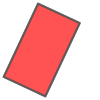

In [17]:
gdf.loc[0].geometry

In [18]:
print(gdf.loc[0].geometry)

MULTIPOLYGON Z (((415471.94 5320160.91 254.218, 415470.47 5320157.78 254.218, 415468.69 5320158.61 254.218, 415470.16 5320161.74 254.218, 415471.94 5320160.91 254.218)), ((415470.16 5320161.74 272.838, 415468.69 5320158.61 272.838, 415470.47 5320157.78 272.838, 415471.94 5320160.91 272.838, 415470.16 5320161.74 272.838)), ((415471.94 5320160.91 272.838, 415470.47 5320157.78 272.838, 415470.47 5320157.78 254.218, 415471.94 5320160.91 254.218, 415471.94 5320160.91 272.838)), ((415470.47 5320157.78 272.838, 415468.69 5320158.61 272.838, 415468.69 5320158.61 254.218, 415470.47 5320157.78 254.218, 415470.47 5320157.78 272.838)), ((415468.69 5320158.61 272.838, 415470.16 5320161.74 272.838, 415470.16 5320161.74 254.218, 415468.69 5320158.61 254.218, 415468.69 5320158.61 272.838)), ((415470.16 5320161.74 272.838, 415471.94 5320160.91 272.838, 415471.94 5320160.91 254.218, 415470.16 5320161.74 254.218, 415470.16 5320161.74 272.838)))


In [19]:
gdf.loc[0].geometry.geoms

In [20]:
multi_polygon = gdf.loc[0].geometry

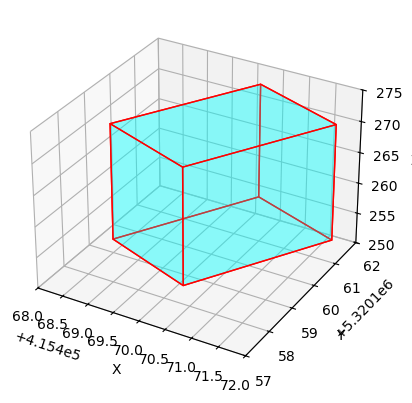

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely.geometry import MultiPolygon, Polygon

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Function to plot a single polygon
def plot_polygon(ax, polygon):
    x, y, z = zip(*polygon.exterior.coords)
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

# Plot each polygon in the MultiPolygon
for polygon in multi_polygon.geoms:
    plot_polygon(ax, polygon)

# Adjust the limits and labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([415468, 415472])
ax.set_ylim([5320157, 5320162])
ax.set_zlim([250, 275])

plt.show()